# HW05 Encoding Qualitative Variables and Interations

In this homework, we will explore how to encode qualitative variables and how to include interactions in regression models and see if they improve the model fit.
As alwaysm we will start with loading the necessary libraries and the dataset.

**Loading Libraries**


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
import seaborn as sns
plt.style.use('ggplot')
# Set the number of rows to display
pd.set_option('display.max_rows', 50)  # Change 20 to your desired number

**Loading dataset**

In [103]:
df_realstate = pd.read_csv('data/Real Estate Data - Week 5.csv',index_col=0,header=0)
df_realstate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 1 to 1460
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dwelling Type             1387 non-null   object 
 1   Lot Frontage              1387 non-null   float64
 2   Lot Area                  1387 non-null   int64  
 3   Land Contour              1387 non-null   object 
 4   Neighborhood              1387 non-null   object 
 5   Location Condition        1387 non-null   object 
 6   Overall Quality           1387 non-null   int64  
 7   Overall Cond              1387 non-null   int64  
 8   Year Built                1387 non-null   int64  
 9   Masonry/Veneer Area       1387 non-null   float64
 10  Basement Finished Area    1387 non-null   int64  
 11  Basement Unfinished Area  1387 non-null   int64  
 12  1st Floor Area            1387 non-null   int64  
 13  2nd Floor Area            1387 non-null   int64  
 14  Bedrooms Abov

We need to encode those variable which are qualitative which is indicated by the `object` type in the dataset. And they are
- Dwelling Type
- Land Contour
- Neighborhood
- Location COndition
- Kitchen Qual
- Garage Finish
- Sale Condition
- Pool

Most of the models require numeric unput. Categorical variables must be encoded to be used in modeling.

## Create the initial model with Quantitative variables only

### Section 5a : Create X and y

Task in hand:
Build a multiple regression model to predict house sale prices using the quantitative variables only.


In [104]:


# Define X and y
X = df_realstate[['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area',
        'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
        'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars',
        'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom']]
y = df_realstate['Sale Price']

# Add a constant to X
X = sm.add_constant(X)

# Fit the model
reg = sm.OLS(y, X).fit()

# Predict using the model
pred = reg.predict(X)

# Calculate residuals
resid = y - pred

# Show summary of results
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     455.6
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:28:44   Log-Likelihood:                -16115.
No. Observations:                1387   AIC:                         3.227e+04
Df Residuals:                    1368   BIC:                         3.237e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## 6. Encode Qualitative variables using One-Hot and Label Encoder

### Section 6a : One-hot encoding Land Contour
1. **Analyze & Convert 'Land Contour'**  
   - Use `groupby`/`value_counts` to check labels  
   - Create dummy variables (`prefix='lc'`, `drop_first=False`, `dtype='int'`)  
   - Verify with `dummies_lc.sample(15, random_state=42)`

2. **Process All Qualitative Variables**  
   - Repeat for each variable:  
     ∙ Check labels via `groupby`/`value_counts`  
     ∙ Generate dummies (variable-specific `prefix`, `drop_first=False`)  
     ∙ Drop original column with highest count  

3. **Final Validation**  
   - Confirm dummy columns replace all original qualitative features  
   - Check for remaining null values before modeling  

In [105]:
# Group by 'Land Contour' and count occurrences, then sort descending
land_contour_counts = df_realstate.groupby('Land Contour')['Land Contour'].count().sort_values(ascending=False)
print(land_contour_counts)

# Alternatively, using value_counts:
# print(df_realstate['Land

Land Contour
Level         1248
Banked          57
Hillside        48
Depression      34
Name: Land Contour, dtype: int64


In [106]:
# Create dummy variables for 'Land Contour'
dummies_lc = pd.get_dummies(df_realstate['Land Contour'], prefix='lc', drop_first=False, dtype='int')


In [107]:
# View a sample of 15 rows from the dummies_lc DataFrame
dummies_lc.sample(15, random_state=42)

,lc_Banked,lc_Depression,lc_Hillside,lc_Level
Id,,,,
685,0,0,0,1
219,0,0,0,1
996,0,0,0,1
716,0,0,0,1
846,0,0,0,1
251,0,0,0,1
909,0,1,0,0
555,0,0,0,1
761,0,0,0,1


In [108]:
# Drop the 'lc_Level' column from dummies_lc
dummies_lc = dummies_lc.drop('lc_Level', axis=1)

### Section 6b: One-hot encoding Dwelling Type 
• Create a code block and to show a groupby or value_count for Dwelling Type. 
• Create a code block to create the dummy variables for Dwelling Type and name the 
dummy variables DataFrame dummies_dt.  
o Below are the properties to set: 
• prefix = ‘dt’ 
• drop_first = False 
• dtype=’int’ 
• Create a code block to drop the highest value count within dummies_dt.

In [109]:
# Show value counts for 'Dwelling Type'
print(df_realstate['Dwelling Type'].value_counts())
# Create dummy variables for 'Dwelling Type'
dummies_dt = pd.get_dummies(df_realstate['Dwelling Type'], prefix='dt', drop_first=False, dtype='int')
dummies_dt.head()
dummies_dt.shape




Dwelling Type
1-STORY 1946 & NEWER    527
2-STORY 1946 & NEWER    290
1-1/2 STORY ALL AGES    138
1-STORY PUD              87
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     58
SPLIT OR MULTI-LEVEL     57
DUPLEX                   44
2 FAMILY CONVERSION      27
SPLIT FOYER              20
2-1/2 STORY ALL AGES     14
Name: count, dtype: int64


(1387, 12)

In [110]:
dummies_dt = dummies_dt.drop('dt_1-STORY 1946 & NEWER', axis=1)
dummies_dt.shape

(1387, 11)

Section 6c: One-hot encoding Neighborhood 
• Create a code block and to show a groupby or value_count for Neighborhood. 
• Create a code block to create the dummy variables for Neighborhood and name 
the dummy variables DataFrame dummies_nh.  
o Below are the properties to set: 
• prefix = ‘nh’ 
• drop_first = False 
• dtype=’int’ 
• Create a code block to drop the highest value count within dummies_nh. 

In [111]:
# Show value counts for 'Dwelling Type'
print(df_realstate['Neighborhood'].value_counts())
# Create dummy variables for 'Dwelling Type'
dummies_nh = pd.get_dummies(df_realstate['Neighborhood'], prefix='dt', drop_first=False, dtype='int')
dummies_nh.head()
dummies_nh.shape




Neighborhood
North Ames                    214
College Creek                 150
Old Town                      101
Edwards                        87
Somerset                       86
Gilbert                        79
Sawyer                         74
Northridge Heights             74
Northwest Ames                 73
Sawyer West                    58
Crawford                       50
Brookside                      49
Mitchell                       46
Northridge                     38
Timberland                     36
Iowa DOT and Rail Road         34
Clear Creek                    27
South & West of Iowa State     24
Stone Brook                    22
Bloomington Heights            17
Briardale                      16
Veenker                        11
Meadow Village                 10
Northpark Villa                 9
Bluestem                        2
Name: count, dtype: int64


(1387, 25)

In [112]:
dummies_nh = dummies_nh.drop('dt_North Ames', axis=1)
dummies_nh.shape

(1387, 24)

Section 6d: One-hot encoding Location Condition 
• Create a code block and to show a groupby or value_count for Location Condition. 
• Create a code block to create the dummy variables for Location Condition and 
name the dummy variables DataFrame dummies_locc.  
o Below are the properties to set: 
• prefix = ‘locc’ 
• drop_first = False 
• dtype=’int’ 
• Create a code block to drop the highest value count within dummies_locc. 

In [113]:
# Show value counts for 'Location Condition'
print(df_realstate['Location Condition'].value_counts())
# Create dummy variables for 'Location Condition'
dummies_locc = pd.get_dummies(df_realstate['Location Condition'], prefix='locc', drop_first=False, dtype='int')
dummies_locc.head()
dummies_locc.shape

Location Condition
Normal                  1200
Adjacent Feeder St        72
Adjacent Arterial St      43
Adjacent Railroad         37
Near Pos Feature          18
Near Railroad              9
Adjacent Pos Feature       8
Name: count, dtype: int64


(1387, 7)

In [114]:
dummies_locc= dummies_locc.drop('locc_Normal', axis=1)
dummies_locc.shape

(1387, 6)

Section 6e: One-hot encoding Garage Finish 
• Create a code block and to show a groupby or value_count for Garage Finish. 
• Create a code block to create the dummy variables for Garage Finish and name the 
dummy variables DataFrame dummies_gf.  
o Below are the properties to set: 
• prefix = ‘gf’ 
• drop_first = False 
• dtype=’int’ 
• Create a code block to drop the ‘gf_No Garage’ within dummies_gf.  
(Changed 9/24) 

In [115]:
# Show value counts for 'Garage Finish'
print(df_realstate['Garage Finish'].value_counts())
# Create dummy variables for 'Garage Finish'
dummies_gf = pd.get_dummies(df_realstate['Garage Finish'], prefix='gf', drop_first=False, dtype='int')
dummies_gf.head()
# Drop the 'gf_No Garage' column from dummies_gf
dummies_gf = dummies_gf.drop('gf_No Garage', axis=1)

Garage Finish
Unfinished        570
Rough Finished    418
Finished          336
No Garage          63
Name: count, dtype: int64


Section 6f: One-hot encoding Sale Condition 
• Create a code block and to show a groupby or value_count for Sale Condition. 
• Create a code block to create the dummy variables for Sale Condition and name 
the dummy variables DataFrame dummies_sc.  
o Below are the properties to set: 
• prefix = ‘sc’ 
• drop_first = False 
• dtype=’int’ 
• Create a code block to drop the highest value count within dummies_sc. 
• Create a code block to view the column names. 


In [116]:
# Show value counts for 'Sale Condition'
print(df_realstate['Sale Condition'].value_counts())
# Create dummy variables for 'Sale Condition'
dummies_sc = pd.get_dummies(df_realstate['Sale Condition'], prefix='sc', drop_first=False, dtype='int')
dummies_sc.head()

Sale Condition
Normal Sale                                                                                   1146
Home was not completed when last assessed (associated with New Homes)                          118
Abnormal Sale -  trade, foreclosure, short sale                                                 92
Sale between family members                                                                     20
Allocation - two linked properties with separate deeds, typically condo with a garage unit      11
Name: count, dtype: int64


,"sc_Abnormal Sale - trade, foreclosure, short sale","sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit",sc_Home was not completed when last assessed (associated with New Homes),sc_Normal Sale,sc_Sale between family members
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,0,1,0


In [117]:
dummies_sc = dummies_sc.drop(f'sc_Normal Sale', axis=1)

In [118]:
# View the column names of dummies_sc
print(dummies_sc.columns)

Index(['sc_Abnormal Sale -  trade, foreclosure, short sale',
       'sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit',
       'sc_Home was not completed when last assessed (associated with New Homes)',
       'sc_Sale between family members'],
      dtype='object')


In [119]:
# Rename columns for dummies_sc for easier reading
dummies_sc = dummies_sc.rename(columns={
    'sc_Abnormal Sale -  trade, foreclosure, short sale': 'sc_Abnormal Sale',
    'sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit': 'sc_Allocation',
    'sc_Home was not completed when last assessed (associated with New Homes)': 'sc_Home not complete',
    'sc_Sale between family members': 'sc_Sale within Family'
})
dummies_sc.head()

,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family
Id,,,,
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0
5,0,0,0,0


Section 6g: Label encoding Pool 
• Create a code block to import Label Encoder from sklearn. 
o from sklearn.preprocessing import LabelEncoder 
o lc = LabelEncoder() 
• Create a code block and to show a groupby or value_count for Pool. (Notice there 
are only 5 homes where Pool is Yes.) 
• Create a code block to encode the values for Pool from No to 0 and Yes to 1 using 
lc.fit_transform (Video - C1.S9.Py03: Combining multiple categories of verified 
income and using label encoding) 
• Create a code block and to show a groupby or value_count for Pool. (Notice there 
are only 5 homes where Pool is 1.) 

In [120]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
# Show value counts for 'Pool'
print(df_realstate['Pool'].value_counts())
# Encode 'Pool' values: No -> 0, Yes -> 1
df_realstate['Pool'] = lc.fit_transform(df_realstate['Pool'])
# Show value counts for encoded 'Pool'
print(df_realstate['Pool'].value_counts())

Pool
No     1382
Yes       5
Name: count, dtype: int64
Pool
0    1382
1       5
Name: count, dtype: int64


7. Create new X dataset and Re-Run Multiple Regression 
Section 7a: Concatenate dummy variables to df_realestate 
• You should have created the following DataFrames using one-hot encoding. 
o dummies_lc 
o dummies_nh 
o dummies_locc 
o dummies_gf 
o dummies_sc 
• Now it is time to join these DataFrames with df_realestate. 
• Create a code block to concatenate the dummies DataFrames (listed above) to 
df_realestate.

In [121]:
# Concatenate the dummy variable DataFrames to df_realstate
df_encoded = pd.concat([df_realstate, dummies_lc, dummies_nh, dummies_locc, dummies_gf, dummies_sc], axis=1)

df_encoded.head()

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,...,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,gf_Finished,gf_Rough Finished,gf_Unfinished,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family
Id,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65.0,8450,Level,College Creek,Normal,7,5,2003,196.0,...,0,0,0,0,1,0,0,0,0,0
2,1-STORY 1946 & NEWER,80.0,9600,Level,Veenker,Adjacent Feeder St,6,8,1976,0.0,...,0,0,0,0,1,0,0,0,0,0
3,2-STORY 1946 & NEWER,68.0,11250,Level,College Creek,Normal,7,5,2001,162.0,...,0,0,0,0,1,0,0,0,0,0
4,2-STORY 1945 & OLDER,60.0,9550,Level,Crawford,Normal,7,5,1915,0.0,...,0,0,0,0,0,1,1,0,0,0
5,2-STORY 1946 & NEWER,84.0,14260,Level,Northridge,Normal,8,5,2000,350.0,...,0,0,0,0,1,0,0,0,0,0


Section 7b: Create new X and y datasets 
• Create a code block to create X and y by including the quantitative features and the 
new dummy variables and ‘Sale Price’ for y.  
• X should include: 
o 'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer 
Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor 
Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above 
Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half 
Bathrooms', 'Extra Kitchens', 'Baths per Bedroom' 
o Also include ‘Pool’ and all of the features from the five dummies 
DataFrames. 
o You should have a total of 70 features for X. (You can see this be doing a 
.info() for X.) 
• y should include: 
o ‘Sale Price’
• Create a code block and execute a multiple regression using statsmodels. Make 
sure to include the following: 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results.

In [122]:
# Create the list of quantitative features
quant_features = [
    'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area',
    'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
    'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars',
    'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom'
]

# Combine all feature names for X
X_features = quant_features + ['Pool'] + list(dummies_lc.columns) + list(dummies_nh.columns) + \
             list(dummies_locc.columns) + list(dummies_gf.columns) + list(dummies_sc.columns)

# Create X and y
X = df_encoded[X_features]
y = df_encoded['Sale Price']

# Check the number of features
print("Number of features in X:", X.shape[1])

# Add a constant to X
X = sm.add_constant(X)

# Fit the model
reg = sm.OLS(y, X).fit()

# Predict using the model
pred = reg.predict(X)

# Calculate residuals
resid = y - pred

# Show summary of results
print(reg.summary())

Number of features in X: 59
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     206.5
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:37:44   Log-Likelihood:                -15855.
No. Observations:                1387   AIC:                         3.183e+04
Df Residuals:                    1327   BIC:                         3.214e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Began by examining the p-values for each feature in the regression output. Features with p-values greater than 0.05 are considered not statistically significant, meaning they do not have a meaningful impact on predicting the sale price in this model. In the results, several features—including 'Pool', 'lc_Banked', 'lc_Depression', and some dummy variables for neighborhoods—were not significant.

The adjusted R-squared value for  model is 0.897, which indicates that about 89.7% of the variance in sale prices is explained by the features included. This is a strong fit, but the presence of many non-significant variables suggests the model may be too complex or that some variables are not contributing useful information.

When many predictors are included, especially those that are not significant, it can lead to issues like multicollinearity. This is when two or more variables are highly correlated, making it difficult to separate out their individual effects. Multicollinearity can inflate the standard errors and make p-values unreliable.

To address this,  next steps will be to:

Examine the residual plots to check for any patterns or non-randomness, which could indicate problems with the model.
Calculate the Variance Inflation Factor (VIF) for each feature to assess multicollinearity. If certain features have high VIF values, I will consider removing or combining them.
Iteratively remove non-significant features and re-run the regression to see if the model improves.

Section 7c: Analyze and Visualize the Multiple Regression Results 
• There are a lot of features in this model.  Some of the features probably do not belong (which we really look into for the next HW).  But prior to making those decisions, we can analyze the results in many ways, including visually and using VIF. (Jointplot)
 
Create a Correlation Matrix  
• There are a lot of features in this regression model, but let’s create a correlation 
matrix, even though it will be hard to read.  Using a heatmap, we may be able to 
gain some insight.  A heatmap is a good way to visualize the relationships between 
all of the features, even when there are a lot.  To create a heatmap, you will first 
need a correlation matrix. 
• Create a code block to create a DataFrame named features that includes all of the 
features in the X dataset only (no ‘const’).  Make sure to drop ‘const’. (See Video 
C1.S8.Py05 - Re-run a multiple regression because of multi-collinearity). 
• Create a code block and create a correlation matrix for the features in the features 
DataFrame.  Name the new correlation matrix corrMatrix. 
• Create a code block that converts corrMatrix to a DataFrame and name the new 
DataFrame df_corrMatrix. 
o Make sure to the view df_corrMatrix. 
• TIP: If you want to see all of the rows, you can add this set option in the code block 
(at the top) with a max rows above the number of features.  This will allow you to 
see all rows without a break.  For example: 
o pd.set_option('display.max_rows', 100) 
Create a Heatmap  
• This will be a crowded heatmap, but let’s give it a try and see if it provides any 
insight. 
• It is now time to create the heatmap using df_corrMatrix. 
• Create a code block that create a heatmap.  It should include: 
o Set the colormap to RdBu.  You can do this with this as the top line of code in 
this code block. 
§ colormap = plt.cm.RdBu 
o Heatmap should include the following: 
§ df_corrMatrix 
§ linewidths is 0.1 
§ vmax is 1.0, vmin= -1.0, #this sets the max and min scale 
§ square=True 
10 
HW05 – Encoding Qualitative Variables and Interaction   
§ cmap=colormap #uses the colormap we created for colors 
§ linecolor='white' 
§ annot=False #this does not add the actual correlations into each square – 
there is not enough room. 
o NOTE: It will be difficult to read, but the one that might jump out at you is the 
correlation between ‘Extra Kitchens’ and ‘dt_DUPLEX’. 
Create the Variance Inflation Factor (VIF)  
• Create a VIF for the features in the multiple regression (See Video C1S8.Py04: 
Calculating VIF for features in a model). 
o Name the DataFrame vif. 
o vif should include two columns [‘VIF Factor’ and ‘Features’]  
o Sort and show vif by ‘VIF Factor’ and from largest to smallest. 
o Note: Notice that ‘the ‘Garage Finish’ dummy variables have the highest VIF.

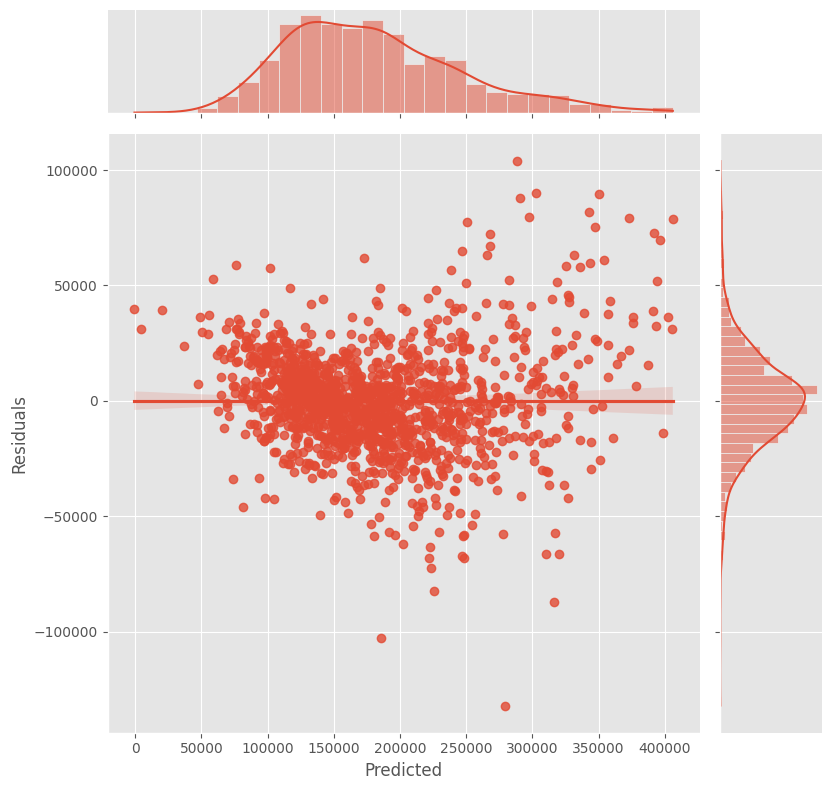

In [127]:

# Visualize residuals vs. predicted values using a jointplot

residuals_df = pd.DataFrame({'Predicted': pred, 'Residuals': resid})

sns.jointplot(x='Predicted', y='Residuals', data=residuals_df, kind='reg', ratio=5, height=8)

In [123]:
# Set display option to show all rows
pd.set_option('display.max_rows', 100)

# Create a DataFrame named features with all features in X except 'const'
features = X.drop('const', axis=1)

# Create a correlation matrix for the features DataFrame
corrMatrix = features.corr()

# Convert corrMatrix to a DataFrame and view it
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix.head()

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,...,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,gf_Finished,gf_Rough Finished,gf_Unfinished,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family
Lot Frontage,1.000000,0.066948,0.139714,-0.047409,0.068354,-0.000469,0.149397,0.187143,0.007172,0.130475,...,-0.011321,-0.081303,0.001677,0.040480,0.063409,-0.090919,-0.004469,-0.014972,0.166247,0.030157
Lot Area,0.066948,1.000000,0.065029,0.000716,0.051788,0.159935,-0.009324,0.251585,0.013684,0.105437,...,0.031052,0.008458,-0.014275,0.075894,0.017024,-0.059019,-0.029849,0.012811,0.000583,-0.010674
Overall Quality,0.139714,0.065029,1.000000,-0.120603,0.382993,0.189307,0.302580,0.439118,0.260637,0.066511,...,-0.004689,0.032666,0.012953,0.381246,0.222348,-0.436926,-0.103849,-0.056568,0.310989,-0.028844
Overall Cond,-0.047409,0.000716,-0.120603,1.000000,-0.128222,-0.040787,-0.155699,-0.150636,0.023249,0.014872,...,-0.007087,0.014042,0.022150,-0.135373,-0.098077,0.208044,-0.037052,-0.033004,-0.155944,-0.026143
Masonry/Veneer Area,0.068354,0.051788,0.382993,-0.128222,1.000000,0.202266,0.118931,0.284675,0.139341,0.086692,...,-0.048886,0.043064,0.011609,0.164190,0.122460,-0.210423,-0.042255,-0.019137,0.135079,-0.009206


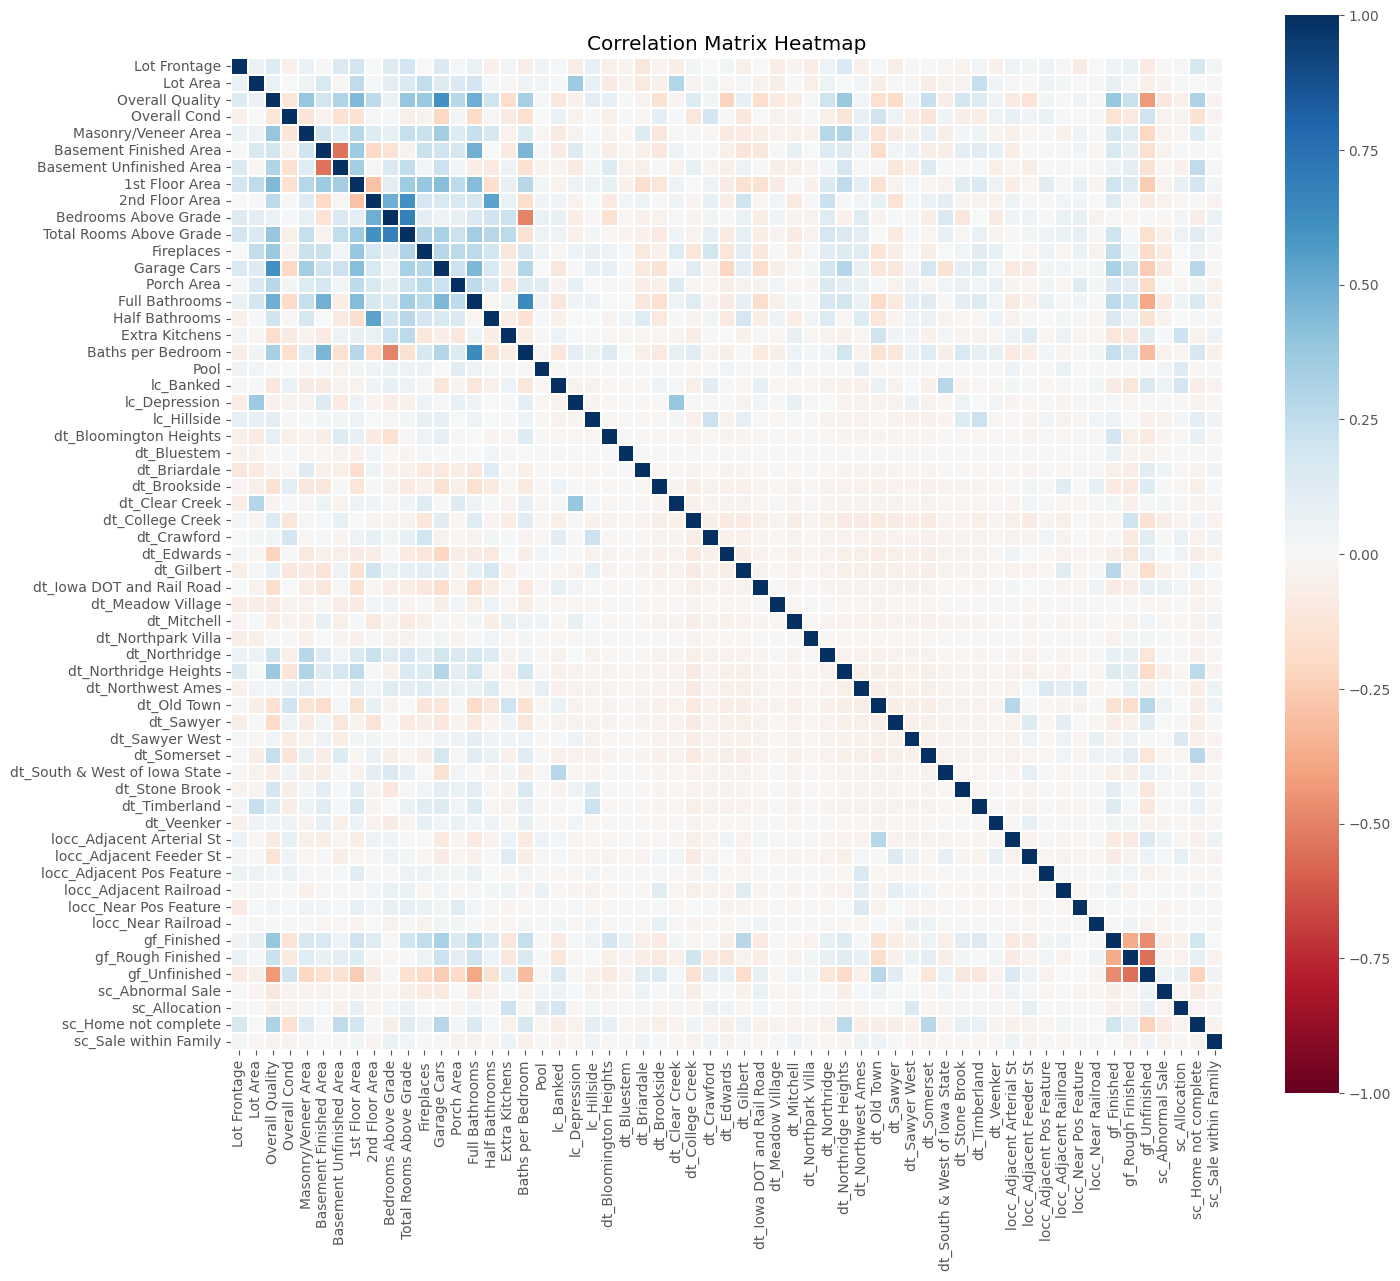

In [124]:
# Create a heatmap for the correlation matrix
def plot_corr_heatmap(df_corrMatrix):
    import matplotlib.pyplot as plt
    import seaborn as sns
    colormap = plt.cm.RdBu
    plt.figure(figsize=(16, 14))
    sns.heatmap(df_corrMatrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
                cmap=colormap, linecolor='white', annot=False)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_corr_heatmap(df_corrMatrix)

In [125]:
# Calculate VIF for the features in the regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF Factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif = vif.sort_values('VIF Factor', ascending=False)
vif.head(20)  # Show top 20 features with highest VIF

,Features,VIF Factor
10,Total Rooms Above Grade,87.426413
2,Overall Quality,68.565335
7,1st Floor Area,57.901281
9,Bedrooms Above Grade,48.856927
14,Full Bathrooms,40.171598
3,Overall Cond,29.456092
12,Garage Cars,21.361160
17,Baths per Bedroom,19.377582
54,gf_Unfinished,13.660255
53,gf_Rough Finished,11.982898


### Analysis of Regression Diagnostics and Next Steps

1. **Residual Plot:**
   - The residual plot is much improved compared to previous models. There is no clear pattern, which suggests that the model fits the data better and the assumptions of linearity and homoscedasticity are more closely met.
   - However, a few outliers are still present, but overall, the residuals are more randomly scattered.

2. **Correlation Matrix (Heatmap):**
   - With so many features, the heatmap is crowded and difficult to interpret visually.
   - It is challenging to pinpoint exact pairs of highly correlated features just by looking at the heatmap, but it does suggest that some features are strongly related.

3. **Variance Inflation Factor (VIF):**
   - The VIF analysis provides a clearer picture of multicollinearity.
   - For example, 'Total Rooms Above Grade' has a VIF of 87, which is extremely high.
   - There are 14 variables with VIF values greater than 5, indicating significant multicollinearity among predictors.
   - High VIF values suggest that some features are redundant and may be causing instability in the regression coefficients.

4. **Should We Eliminate Features Based on VIF?**
   - Yes, features with very high VIF (typically above 5 ) should be considered for removal or further investigation, as they can distort the model and make interpretation unreliable.



5. **Practical Relationship: 'Extra Kitchens' and 'dt_DUPLEX':**
   - In real-world terms, homes classified as 'dt_DUPLEX' (duplexes) are much more likely to have extra kitchens, since a duplex is designed to house two separate families or units, each with its own kitchen. This explains the strong correlation between these two features.

